# Finish the following analytics work

#### 1.Determine European options from your Option2017_2_Clean.csv by using Brent or bisection method and write all European options as EuropeanOption2017.csv 

In [80]:
import numpy as np
import pandas as pd
from scipy import stats, optimize
from math import pi, exp, sqrt,log
import warnings; warnings.simplefilter('ignore')

In [81]:
option = pd.read_csv('Option2017_2_Clean.csv')

In [82]:
option = option.drop(['Unnamed: 0'],axis=1)

In [83]:
option.shape

(7174, 20)

In [84]:
def difference(initial_point, S, K, T, r, option_type, mkt_price):
    
    d1 = (log(S/K) + (r + 0.5*initial_point**2)*T)/(initial_point*sqrt(T))
    d2 = d1 - initial_point*sqrt(T)
    
    if option_type == 'Call':
        N_d1 = stats.norm.cdf(d1,0.0,1.0)
        N_d2 = stats.norm.cdf(d2,0.0,1.0)
        eu_price = (S*N_d1 - K*exp(-r*T)*N_d2)
        
    if option_type == 'Put':
        N_n_d1 = stats.norm.cdf(-d1,0.0,1.0)
        N_n_d2 = stats.norm.cdf(-d2,0.0,1.0)
        eu_price = (K*exp(-r*T)*(N_n_d2)-S*(N_n_d1))
    
    difference = eu_price-mkt_price
    
    return difference

To get the tolerance of option price accuracy: set the margin of calculation error is 5 percent of option last price.

In [85]:
option.loc[:,'Tolerance'] = option.loc[:,'implied volatility']*0.05

Assume the range of root is (10**(-10), max of implied volatility):

In [86]:
vol_min = -option['implied volatility'].max()
vol_max = option['implied volatility'].max()

In [87]:
option['implied volatility'].max()

1.99964

In [88]:
r = 0.03

In [89]:
for i in range(len(option)):
    S = option.loc[i,'Underlaying asset price']
    K = option.loc[i,'StrikePrice']
    T = option.loc[i,'Expiration time']
    mkt_price = option.loc[i,'Last']
    option_type = option.loc[i,'Type']
    tolerance = option.loc[i,'Tolerance']
    
    try:
        optimize.brentq(difference,vol_min,vol_max,args=(S,K,T,r,option_type,mkt_price))
    except:
        option.loc[i,'Class'] = 'Others'
    else:
        option.loc[i,'Cal_Vol'] = optimize.brentq(difference,vol_min,vol_max,args=(S,K,T,r,option_type,mkt_price))
        if abs(option.loc[i,'Cal_Vol']-option.loc[i,'implied volatility'])>tolerance:
            option.loc[i,'Class'] = 'Others'
        else:
            option.loc[i,'Class'] = 'European'

In [90]:
option[option['Class']=='European'].to_csv('EuropeanOption2017.csv')

In [91]:
euro_op = option[option['Class']=='European']

In [92]:
option.head()

,ExpDate,StrikePrice,Ticker,Type,Last,Chg,Bid,Ask,Vol,Open Int,...,Theta,Vega,implied volatility,currentDate,Implied volatility,Underlaying asset price,Expiration time,Tolerance,Cal_Vol,Class
0,2017-03-17,22.5,ARR,Put,0.95,-0.35,0.65,1.25,1.0,9.0,...,-0.00832,0.02372,0.27590,2/17/17,0.27590,21.709999,0.076660,0.013795,0.203360,Others
1,2017-04-21,22.0,ARR,Call,0.30,-0.20,0.10,0.40,40.0,659.0,...,-0.00408,0.03730,0.10719,2/17/17,0.10719,21.709999,0.172485,0.005360,0.105710,European
2,2017-04-21,20.0,ARR,Put,0.15,-0.05,0.05,0.20,3.0,251.0,...,-0.00275,0.01999,0.25595,2/17/17,0.25595,21.709999,0.172485,0.012798,0.209552,Others
3,2017-04-21,22.0,ARR,Put,0.83,-0.02,0.65,1.00,1.0,166.0,...,-0.00457,0.03551,0.21858,2/17/17,0.21858,21.709999,0.172485,0.010929,0.204517,Others
4,2017-04-21,23.0,ARR,Put,1.55,0.05,1.40,1.85,2.0,145.0,...,-0.00590,0.03575,0.33344,2/17/17,0.33344,21.709999,0.172485,0.016672,0.226779,Others


#### 1.(a) Visualize and generate eps/tiﬀ ﬁles: The implied volatility of all call/put options (histogram) 

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

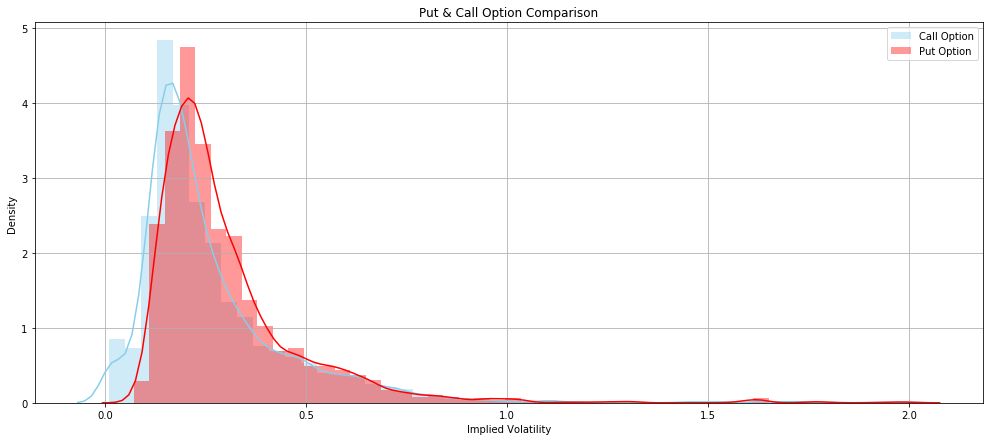

In [94]:
fig = plt.figure(figsize=(17,7))

sns.distplot(option[option.Type == 'Call']['Implied volatility'], color="skyblue", label="Call Option")
sns.distplot(option[option.Type == 'Put']['Implied volatility'], color="red", label="Put Option")
plt.ylabel('Density')
plt.xlabel('Implied Volatility')
plt.title('Put & Call Option Comparison')
plt.legend()
plt.grid()

#### The time to maturity of all data:

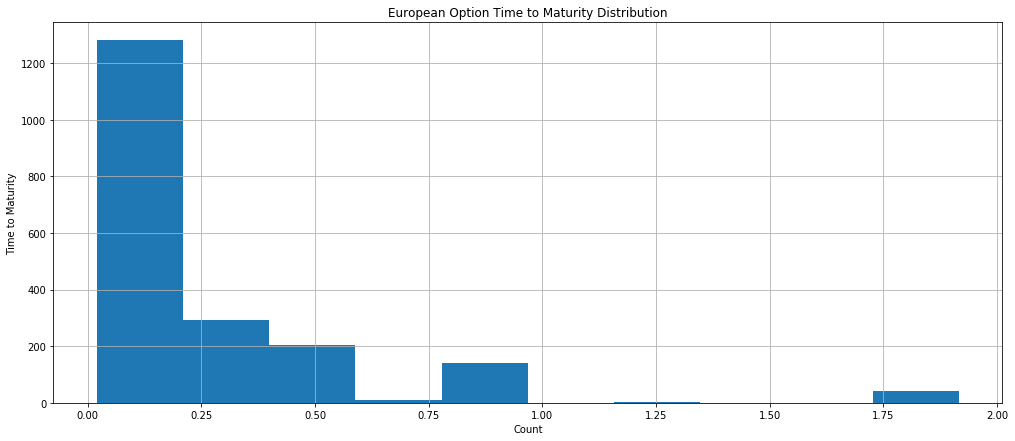

In [95]:
plt.figure(figsize=(17,7))
plt.hist(euro_op['Expiration time'])
plt.xlabel('Count')
plt.ylabel('Time to Maturity')
plt.title('European Option Time to Maturity Distribution')
plt.grid()

#### The histogram of all underlying prices and option prices:

In [96]:
euro_op.columns

Index(['ExpDate', 'StrikePrice', 'Ticker', 'Type', 'Last', 'Chg', 'Bid', 'Ask',
       'Vol', 'Open Int', 'Delta', 'Gamma', 'Rho', 'Theta', 'Vega',
       'implied volatility', 'currentDate', 'Implied volatility',
       'Underlaying asset price', 'Expiration time', 'Tolerance', 'Cal_Vol',
       'Class'],
      dtype='object')

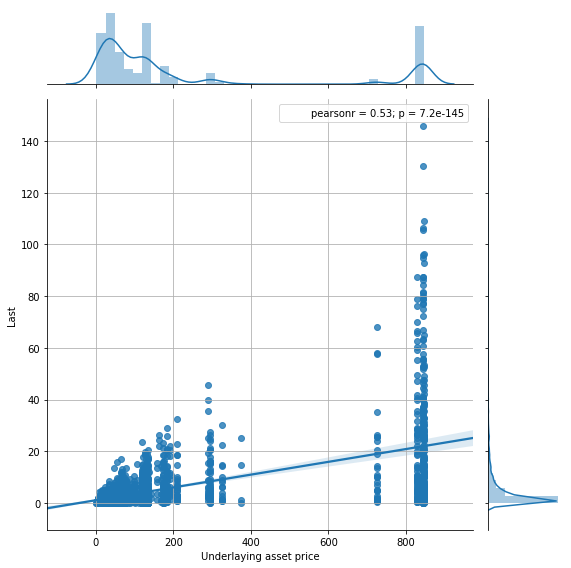

In [97]:
sns.jointplot(data=euro_op,x='Underlaying asset price',y='Last',kind='reg',size=8)
plt.grid()

#### 2. Apply the following methods to estimate the implied volatility for the put and call option data you get by using tolerance 10−12 in iteration and interest rate 0.03. 

In [98]:
euro_op.shape

(1972, 23)

#### a. the classic Bisection method 

In [99]:
def bsm_value(S, K, T, r, sigma_est, option_type):
    if option_type == 'Call':
        d1 = (np.log(S/K) + (r + 0.5 * sigma_est ** 2) * T)/ (sigma_est * np.sqrt(T))
        d2 = d1 - sigma_est * np.sqrt(T)
        N_d1 = stats.norm.cdf(d1,0.0,1.0)
        N_d2 = stats.norm.cdf(d2,0.0,1.0)
        bs_price = (S * N_d1 - K * np.exp( -r*T ) * N_d2)
            
    if option_type == 'Put':
        d1 = (np.log(S/K) + (r + 0.5 * sigma_est ** 2) * T)/ (sigma_est * np.sqrt(T))
        d2 = d1 - sigma_est * np.sqrt(T)
        N_n_d1 = stats.norm.cdf(-d1,0.0,1.0)
        N_n_d2 = stats.norm.cdf(-d2,0.0,1.0)
        bs_price = K * np.exp( -r*T ) * N_n_d2 - S * N_n_d1  
    return bs_price

def bisection(fs,fb,small,big,S,K,T,r,option_type,market_price,eps): 
    count=0
    if fs*fb==0:
        if fs==0:
            return small,count
        else:
            return big,count
    if fs*fb>0:
        return np.NaN,count
    while (fs*fb<0):
        count=count+1
        middle=(small+big)/2.0
        fm= (bsm_value(S,K,T,r,middle,option_type)- market_price)
        if (fs*fm<0):
            big=middle
            fb=(bsm_value(S,K,T,r,big,option_type)- market_price)
        if (fm*fb<0):
            small=middle
            fs=(bsm_value(S,K,T,r,small,option_type)- market_price)
        if ( abs(fm) < eps):
            return middle,count

In [100]:
import time
r = 0.03
eps = 10**(-12)
small = 0.000000001
big = 4

est_implied_volatility_list_bisection = []
count_list_bisection = []

start = time.clock()
for i in range(len(euro_op)):
    S = euro_op.iloc[i]['Underlaying asset price']
    K = euro_op.iloc[i]['StrikePrice']
    T = euro_op.iloc[i]['Expiration time']
    market_price = euro_op.iloc[i]['Last']
    option_type = euro_op.iloc[i]['Type']
    
    fs = (bsm_value(S, K, T, r, small, option_type) - market_price)
    fb = (bsm_value(S, K, T, r, big, option_type) - market_price)
    est_implied_volatility_bisection, count_bisection = bisection(fs,fb,small,big,S,K,T,r,option_type,market_price,eps)
    est_implied_volatility_list_bisection.append(est_implied_volatility_bisection)
    count_list_bisection.append(count_bisection)
    
end = time.clock()
Running_Time_Bisection = end - start
print('Running time: ',Running_Time_Bisection)

Running time:  54.565850126103896


In [101]:
euro_op['est_implied_volatility_bisection'] = est_implied_volatility_list_bisection
euro_op['count_bisection'] = count_list_bisection
euro_op.head()

#Calculate the MSE and efficiency
MSE_bisection = sum((euro_op['est_implied_volatility_bisection'] - euro_op['Implied volatility']) ** 2)/euro_op.shape[0]
E_bisection = euro_op['count_bisection'].mean()
ratio_bisection = 1/((1+MSE_bisection)*log((1+E_bisection),2))

#### b. Brent method

In [102]:
est_implied_volatility_list_brent = []
count_list_brent = []

start = time.clock()
for i in range(len(euro_op)):
    S = euro_op.iloc[i]['Underlaying asset price']
    K = euro_op.iloc[i]['StrikePrice']
    T = euro_op.iloc[i]['Expiration time']
    mkt_price = euro_op.iloc[i]['Last']
    option_type = euro_op.iloc[i]['Type']
    a,b = optimize.brentq(difference,vol_min,vol_max,args=(S,K,T,r,option_type,mkt_price),full_output = True)
    est_implied_volatility_list_brent.append(a)
    count_list_brent.append(b.iterations)
    
end = time.clock()
Running_Time_Brent = end - start
print('Running time: ',Running_Time_Brent)

Running time:  8.207845695087826


In [103]:
euro_op['est_implied_volatility_brent'] = est_implied_volatility_list_brent
euro_op['count_brent'] = count_list_brent
euro_op.head()

#Calculate the MSE and efficiency
MSE_brent = sum((euro_op['est_implied_volatility_brent'] - euro_op['Implied volatility']) ** 2)/euro_op.shape[0]
E_brent = euro_op['count_brent'].mean()
ratio_brent = 1/((1+MSE_brent)*log((1+E_brent),2))

#### c. Muller Bisection Method 

In [104]:
import sympy
x = sympy.symbols('x', interger = True)

def f(x):
    return (bsm_value(S, K, T, r, x, option_type)- mkt_price)

In [105]:
def Muller_Bisection(a, b, fa, fb, S, K, T, r, option_type, mkt_price, eps):
    count = 0
    # Select three points (a,f(a)), (b,f(b)), (c,f(c))
    c = (a+b)/2      
    
    if fa*fb == 0:
        if fa == 0:
            return a, count
        if fb == 0:
            return b, count
    if fa*fb > 0:
        return np.NaN, count
    while fa*fb < 0:
        count = count + 1
        fa = f(a)
        fb = f(b)
        
        # Create subinterval [a2, b2]
        if fa*f(c) < 0:
            a2 = a
            b2 = c
        if fb*f(c) < 0:
            a2 = c
            b2 = b

        # Determine the coefficients of the quadratic function A, B,C
        C = f(c)
        B = ((a-c)**2*(fb-f(c))-(b-c)**2*(fa-f(c)))/((a-c)*(b-c)*(a-b))
        A = ((b-c)*(fa-f(c))-(a-c)*(fb-f(c)))/((a-c)*(b-c)*(a-b))
        
        # Iteration : get the next approximation
        d = c - 2*C/(B + np.sign(B)*np.sqrt(B**2-4*A*C))
        
        if fa*f(c)<0:
            c = b
        if f(c)*fb<0:
            c = a   
            
        
        if d>=a2 and d<=b2:
            d = d
        else:
            d = (a2+b2)/2
            
        c = d 
        a = a2
        b = b2
        
        # until finding a sufficiently accurate solution
        if (f(d)==0 or abs(f(d))<eps):
            return d, count

In [106]:
count_muller = []
ImpVol_Muller = []
start = time.clock()

for i in range(len(euro_op)): 
    a = 0.000000001
    b = 4
    eps = 10**(-12)
    r = 0.03
    fa = f(a)
    fb = f(b)
    S = euro_op.iloc[i]['Underlaying asset price']
    K = euro_op.iloc[i]['StrikePrice']
    T = euro_op.iloc[i]['Expiration time']
    mkt_price = euro_op.iloc[i]['Last']
    option_type = euro_op.iloc[i]['Type']
    est,count = Muller_Bisection(a, b, fa, fb, S, K, T, r, option_type, mkt_price, eps)
    ImpVol_Muller.append(est)
    count_muller.append(count)

end = time.clock()
Running_Time_Muller_Bisection = end - start
print('Running time: ',Running_Time_Muller_Bisection)

Running time:  51.44804341573786


In [107]:
euro_op['ImpVol_Muller'] = ImpVol_Muller
euro_op['count_muller'] = count_muller

In [108]:
# Calculate MSE
mse_muller = (euro_op['ImpVol_Muller']-euro_op['implied volatility'])**2
MSE_Muller = mse_muller.mean()
print("MSE for Muller Bisection method is " + str(MSE_Muller))

MSE for Muller Bisection method is 9.31895656929761e-05


In [109]:
# Calculate average iteration number
Et_Muller = euro_op['count_muller'].mean()
print("The average iteration number to converge for Muller Bisection method is " + str(Et_Muller))

The average iteration number to converge for Muller Bisection method is 6.181034482758621


In [110]:
# Calculate ratio
ratio_Muller = 1/((1+MSE_Muller)*np.log2(1+Et_Muller))
ratio_Muller

0.35156098041835215

####  d. Newton method 

In [111]:
def bsm_value(S, K, T, r, sigma_est, option_type):
    if option_type == 'Call':
        d1 = (np.log(S/K) + (r + 0.5 * sigma_est ** 2) * T)/ (sigma_est * np.sqrt(T))
        d2 = d1 - sigma_est * np.sqrt(T)
            
        N_d1 = stats.norm.cdf(d1,0.0,1.0)
        N_d2 = stats.norm.cdf(d2,0.0,1.0)
            
        bs_price = (S * N_d1 - K * np.exp( -r*T ) * N_d2)
            
    if option_type == 'Put':
        d1 = (np.log(S/K) + (r + 0.5 * sigma_est ** 2) * T)/ (sigma_est * np.sqrt(T))
        d2 = d1 - sigma_est * np.sqrt(T)
        
        N_n_d1 = stats.norm.cdf(-d1,0.0,1.0)
        N_n_d2 = stats.norm.cdf(-d2,0.0,1.0)
        
        bs_price = K * np.exp( -r*T ) * N_n_d2 - S * N_n_d1  
    return bs_price

def bsm_vega(S,K,T,r,sigma):
    d1= (np.log(S/K)+ (r+0.5*sigma**2)*T)/ (sigma*np.sqrt(T))
    vega= S*stats.norm.pdf(d1,0.0,1.0)* np.sqrt(T)
    return vega

eps = 10**(-12)
def bsm_call_imp_vol(S, K, T, r, C_star, sigma_est, option_type):
    count = 0
    if abs(bsm_value(S, K, T, r, sigma_est, option_type) - C_star) < eps:
        return sigma_est, count
    else:
        while abs(bsm_value(S,K,T,r,sigma_est,option_type)- C_star) > eps:
            count = count + 1
            f1 = bsm_value(S, K, T, r, sigma_est, option_type) - C_star
            f_vega = bsm_vega(S,K,T,r,sigma_est)
            sigma_before = sigma_est
            sigma_est = sigma_est-(f1/f_vega)
            if (abs(bsm_value(S,K,T,r,sigma_est,option_type)-C_star) < eps or abs(sigma_est-sigma_before)< eps):
                return sigma_est, count

In [112]:
sigma_est = 0.3
r = 0.03
est_implied_volatility_list_newton = []
count_list_newton = []

start = time.clock()
for i in range(len(euro_op)):
    S = euro_op.iloc[i]['Underlaying asset price']
    K = euro_op.iloc[i]['StrikePrice']
    T = euro_op.iloc[i]['Expiration time']
    mkt_price = euro_op.iloc[i]['Last']
    option_type = euro_op.iloc[i]['Type']
    
    est_implied_volatility_newton, count_newton = bsm_call_imp_vol(S, K, T, r, mkt_price, sigma_est, option_type)
    est_implied_volatility_list_newton.append(est_implied_volatility_newton)
    count_list_newton.append(count_newton)

end = time.clock()
Running_Time_Newton = end - start
print('Running time: ',Running_Time_Newton)

Running time:  12.097480768379683


In [113]:
euro_op['est_implied_volatility_newton'] = est_implied_volatility_list_newton
euro_op['count_newton'] = count_list_newton
euro_op.head()

#Calculate the MSE and efficiency
MSE_newton = sum((euro_op['est_implied_volatility_newton'] - euro_op['Implied volatility']) ** 2)/euro_op.shape[0]
E_newton = euro_op['count_newton'].mean()
ratio_newton = 1/((1+MSE_newton)*log((1+E_newton),2))

#### e. New newton: use brent as the ﬁll-in method to compute initial points 

In [114]:
#New Newton

r = 0.03
est_implied_volatility_list_new_newton = []
count_list_new_newton = []

start = time.clock()
for i in range(len(euro_op)):
    S = euro_op.iloc[i]['Underlaying asset price']
    K = euro_op.iloc[i]['StrikePrice']
    T = euro_op.iloc[i]['Expiration time']
    mkt_price = euro_op.iloc[i]['Last']
    option_type = euro_op.iloc[i]['Type']
    #brent_volitility = euro_op.iloc[i]['brent_implied_volatility']
    initial_point = optimize.brentq(difference,vol_min,vol_max,args=(S,K,T,r,option_type,mkt_price))
    
    est_implied_volatility_new_newton, count_new_newton = bsm_call_imp_vol(S, K, T, r, mkt_price, initial_point, option_type)
    est_implied_volatility_list_new_newton.append(est_implied_volatility_new_newton)
    count_list_new_newton.append(count_new_newton + 3)
    
end = time.clock()
Running_Time_New_Newton = end - start
print('Running time: ',Running_Time_New_Newton)

Running time:  9.540771587769996


In [115]:
euro_op['est_implied_volatility_new_newton'] = est_implied_volatility_list_new_newton
euro_op['count_new_newton'] = count_list_new_newton
euro_op.head()

#Calculate the MSE and efficiency
MSE_new_newton = sum((euro_op['est_implied_volatility_new_newton'] - euro_op['Implied volatility']) ** 2)/euro_op.shape[0]
E_new_newton = euro_op['count_new_newton'].mean()
ratio_new_newton = 1/((1+MSE_new_newton)*log((1+E_new_newton),2))

In [116]:
ratio_new_newton

0.48780860123681496

#### f. New Halley

In [117]:
def bsm_vega(S,K,T,r,sigma):
    d1= (np.log(S/K)+ (r+0.5*sigma**2)*T)/ (sigma*np.sqrt(T))
    vega= S*stats.norm.pdf(d1,0.0,1.0)* np.sqrt(T)
    return vega

In [118]:
# Define Vomma
def bsm_vomma(S,K,T,r,sigma,vega):
    d1= (np.log(S/K)+ (r+0.5*sigma**2)*T)/ (sigma*np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    vomma= vega*d1*d2/sigma
    return vega

In [119]:
def new_halley(S,K,T,r,x,option_type,market_price):
    count=0
    while abs(difference(x, S, K, T, r, option_type, mkt_price)) > error:
        count=count+1
        vega = bsm_vega(S,K,T,r,x)
        vomma = bsm_vomma(S,K,T,r,x,vega)
        x=x-(2.0*difference(x, S, K, T, r, option_type, mkt_price)*vega)/(2.0*vega**2-difference(x, S, K, T, r, option_type, mkt_price)*vomma)
    return x,count

In [120]:
euro_op = pd.read_csv('EuropeanOption2017.csv')

In [121]:
def difference(x, S, K, T, r, option_type, mkt_price):
    
    d1 = (log(S/K) + (r + 0.5*x**2)*T)/(x*sqrt(T))
    d2 = d1 - x*sqrt(T)
    
    if option_type == 'Call':
        N_d1 = stats.norm.cdf(d1,0.0,1.0)
        N_d2 = stats.norm.cdf(d2,0.0,1.0)
        eu_price = (S*N_d1 - K*exp(-r*T)*N_d2)
        
    if option_type == 'Put':
        N_n_d1 = stats.norm.cdf(-d1,0.0,1.0)
        N_n_d2 = stats.norm.cdf(-d2,0.0,1.0)
        eu_price = (K*exp(-r*T)*(N_n_d2)-S*(N_n_d1))
    
    difference = eu_price-mkt_price
    
    return difference

In [122]:
import time

In [123]:
list_new_halley = []
iter_new_halley = []
start = time.clock()
for i in range(len(euro_op)):
    error = pow(10,-12)
    r = 0.03
    S = euro_op.iloc[i]['Underlaying asset price']
    K = euro_op.iloc[i]['StrikePrice']
    T = euro_op.iloc[i]['Expiration time']
    option_type = euro_op.iloc[i]['Type']
    mkt_price = euro_op.iloc[i]['Last']
    initial_point = optimize.brentq(difference,-1,2,args=(S,K,T,r,option_type,mkt_price))
    
    new_value,new_count = (new_halley(S,K,T,r,initial_point,option_type,mkt_price))
    
    list_new_halley.append(new_value)
    iter_new_halley.append(new_count+3)

end = time.clock()
Running_Time_new_halley = end - start
print('Running time: ',Running_Time_new_halley)
        

Running time:  9.235969371630063


In [124]:
euro_op['est_implied_volatility_new_halley'] = list_new_halley
euro_op['count_new_halley'] = iter_new_halley 
euro_op.head()

#Calculate the MSE and efficiency
MSE_new_halley = sum((euro_op['est_implied_volatility_new_halley'] - euro_op['Implied volatility']) ** 2)/euro_op.shape[0]
E_new_halley = euro_op['count_new_halley'].mean()
ratio_new_halley = 1/((1+MSE_new_halley)*log((1+E_new_halley),2))

In [125]:
ratio_new_halley

0.48776655823648124

#### g. Halley’s irrational formula (Note: you can only pick plus sign in your implementation)

In [126]:
def halley_irrational(S,K,T,r,x,option_type,market_price):
    count=0
    while abs(difference(x, S, K, T, r, option_type, mkt_price)) > error:
        count=count+1
        vega = bsm_vega(S,K,T,r,x)
        vomma = bsm_vomma(S,K,T,r,x,vega)
        x=x+(-vega+sqrt((vega**2)-2*difference(x, S, K, T, r, option_type, mkt_price)*vomma))/vomma
    return x,count

In [135]:
sd1 = []
iter_h_irri = []
start = time.clock()
for i in range(len(euro_op)):
    error = pow(10,-12)
    r = 0.03
    S = euro_op.iloc[i]['Underlaying asset price']
    K = euro_op.iloc[i]['StrikePrice']
    T = euro_op.iloc[i]['Expiration time']
 
    implied_volatility = euro_op.iloc[i]['implied volatility']
    option_type = euro_op.iloc[i]['Type']
    mkt_price = euro_op.iloc[i]['Last']
    
    initial_point = optimize.brentq(difference,vol_min,vol_max,args=(S,K,T,r,option_type,mkt_price))
        
    
    new_value,new_count = (halley_irrational(S,K,T,r,initial_point,option_type,mkt_price))
    
    sd1.append(new_value)
    iter_h_irri.append(new_count+3)
#     except:
#         print(i)
#     else:
#         sd1.append(halley_irrational(S,K,T,r,sigma,option_type,market_price))
end = time.clock()
Running_Time_Halley_irrational = end - start
print('Running time: ',Running_Time_Halley_irrational)
        

Running time:  9.982838504958636


In [136]:
euro_op['est_implied_volatility_Halley_irrational'] = sd1
euro_op['count_Halley_irrational'] = iter_h_irri
euro_op.head()

#Calculate the MSE and efficiency
MSE_Halley_irrational = sum((euro_op['est_implied_volatility_Halley_irrational'] - euro_op['Implied volatility']) ** 2)/euro_op.shape[0]
E_Halley_irrational = euro_op['count_Halley_irrational'].mean()
ratio_Halley_irrational = 1/((1+MSE_new_newton)*log((1+E_new_newton),2))

In [137]:
ratio_Halley_irrational

0.48780860123681496

In [138]:
Total = pd.DataFrame([[MSE_bisection,MSE_brent,MSE_Muller,MSE_newton,MSE_new_newton,MSE_new_halley,MSE_Halley_irrational],
                     [E_bisection,E_brent,Et_Muller,E_newton,E_new_newton,E_new_halley,E_Halley_irrational],
                     [ratio_bisection,ratio_brent,ratio_Muller ,ratio_newton,ratio_new_newton,ratio_new_halley,ratio_Halley_irrational],
                     [Running_Time_Bisection,Running_Time_Brent,Running_Time_Muller_Bisection,Running_Time_Newton,Running_Time_New_Newton,Running_Time_new_halley,Running_Time_Halley_irrational]],
                     columns = ['Classic Bisection method','Brent method','Muller-Bisection','Newton method','New newton','New Halley','Halley’s irrational formula'],
                    index = ['MSE','E(t)','Efficiency','Running Time'])


In [139]:
Total

,Classic Bisection method,Brent method,Muller-Bisection,Newton method,New newton,New Halley,Halley’s irrational formula
MSE,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093
E(t),43.369168,7.586714,6.181034,3.670892,3.140467,3.140974,3.140467
Efficiency,0.182749,0.322332,0.351561,0.449659,0.487809,0.487767,0.487809
Running Time,54.565850,8.207846,51.448043,12.097481,9.540772,9.235969,9.982839


In [140]:
df = Total.T

In [141]:
df

,MSE,E(t),Efficiency,Running Time
Classic Bisection method,0.000093,43.369168,0.182749,54.565850
Brent method,0.000093,7.586714,0.322332,8.207846
Muller-Bisection,0.000093,6.181034,0.351561,51.448043
Newton method,0.000093,3.670892,0.449659,12.097481
New newton,0.000093,3.140467,0.487809,9.540772
New Halley,0.000093,3.140974,0.487767,9.235969
Halley’s irrational formula,0.000093,3.140467,0.487809,9.982839


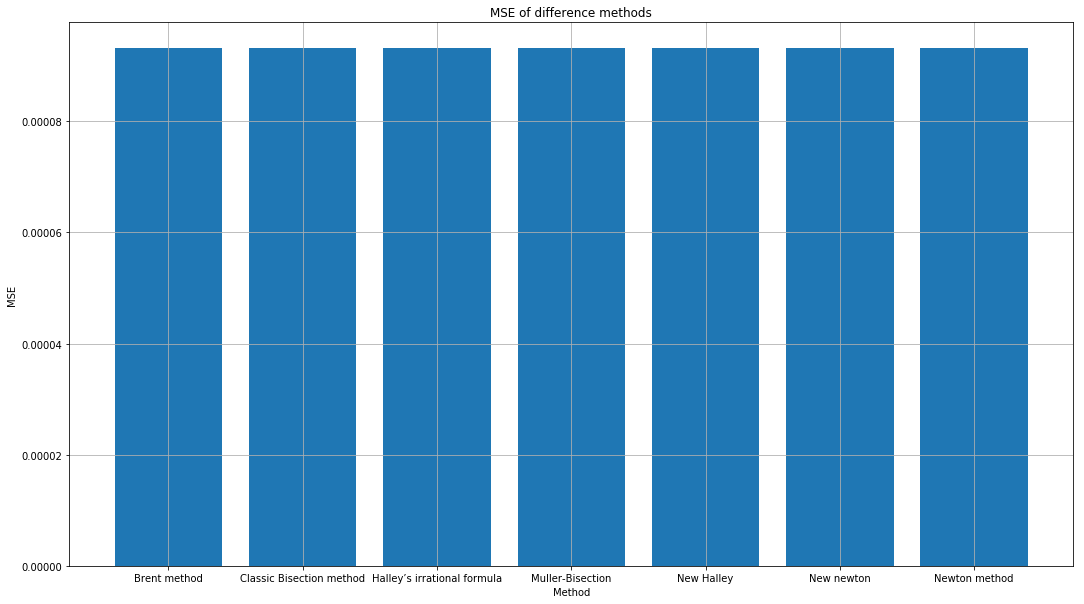

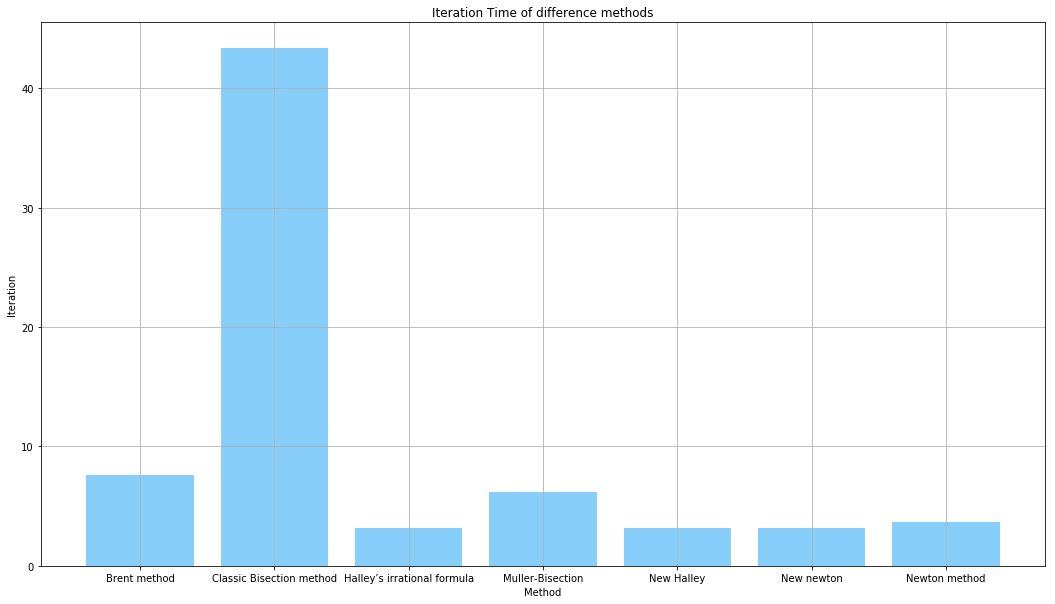

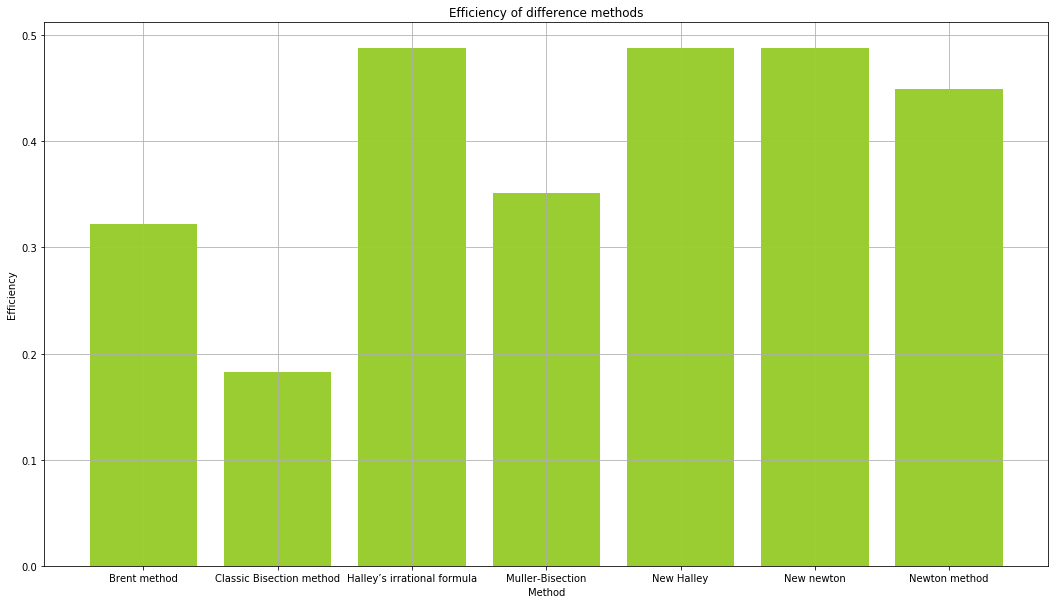

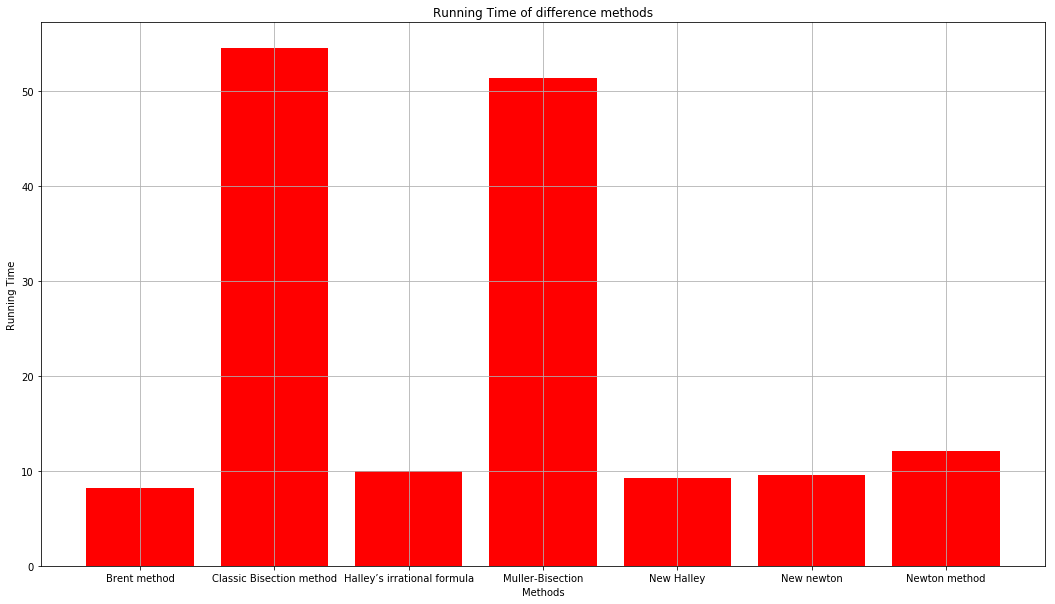

In [142]:

plt.figure(figsize=(18,10))
plt.bar(['Classic Bisection method','Brent method','Muller-Bisection','Newton method','New newton','New Halley','Halley’s irrational formula'],
        df['MSE'])
plt.xlabel('Method')
plt.ylabel('MSE')
plt.title('MSE of difference methods')
plt.grid()

plt.figure(figsize=(18,10))
plt.bar(['Classic Bisection method','Brent method','Muller-Bisection','Newton method','New newton','New Halley','Halley’s irrational formula'],
        df['E(t)'],facecolor = 'lightskyblue')
plt.xlabel('Method')
plt.ylabel('Iteration')
plt.title('Iteration Time of difference methods')
plt.grid()

plt.figure(figsize=(18,10))
plt.bar(['Classic Bisection method','Brent method','Muller-Bisection','Newton method','New newton','New Halley','Halley’s irrational formula'],
        df['Efficiency'],facecolor = 'yellowgreen')
plt.xlabel('Method')
plt.ylabel('Efficiency')
plt.title('Efficiency of difference methods')
plt.grid()

plt.figure(figsize=(18,10))
plt.bar(['Classic Bisection method','Brent method','Muller-Bisection','Newton method','New newton','New Halley','Halley’s irrational formula'],
        df['Running Time'],facecolor = 'red')
plt.xlabel('Methods')
plt.ylabel('Running Time')
plt.title('Running Time of difference methods')
plt.grid()